<style> mred{     color:red; }mblue{    color:CornflowerBlue;}</style>

<style>
mgreen{
    color:darkgreen;
}

mmagen{
    color: Magenta ;
}

myellow{
    color:GoldenRod;
}
mpurple{
    color:plum;
}

    body {
        background-color: #333333;
        color: #e2e2e2;
        text-align: justify;
    }
    h1, h2, h3, h4, h5, h5 {
        color: Cyan;
    }
    img {
        filter: grayscale( 20% );
    }
    hr{
        background-color:white;
        color:white;
    }
    p code {
        color: #333333;
    }
    img {
        filter: brightness(.6) contrast(1.2);
    }

    a{
        color:CornflowerBlue;
    }
    q, cite, blockquote, .blockquote{
        color:PeachPuff;
    }

</style>
<style> h1, h2, h3, h4, h5, h5 { color: Cyan; }</style>
# Evaluation

The goal of this lab is <mblue>to</mblue> introduce you to techniques for evaluating your trained models. The motivation is to be able to select the model that has the best (expected) out-of-sample prediction and to assess(Einschätzung) the quality of the model.

# 1. Model Selection in a holdout setting

We will work with the <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris</a> data set. The iris data set consists out of $4$ features (`sepal length`, `sepal width`, `petal length`, `petal width`) of three kinds of flowers in the iris family: **iris setosa**, **iris versicolor**, **iris virginica**. Our version of the data set has 150 data points with 50 for each class.

In [1]:
# Load the data
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
print('Loaded {} data points'.format(len(iris.data)))

X, y = iris.data, iris.target

print('Class labels: {}'.format(list(zip(range(3), iris.target_names))))

Loaded 150 data points
Class labels: [(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]


We try to classify the <b style="color:lightgreen">iris versicolor</b> with the help of the first two features.

In [2]:
import numpy as np

X_versi = X[:, :2] 
y_versi = np.zeros(len(y))
y_versi[y == 1] = 1

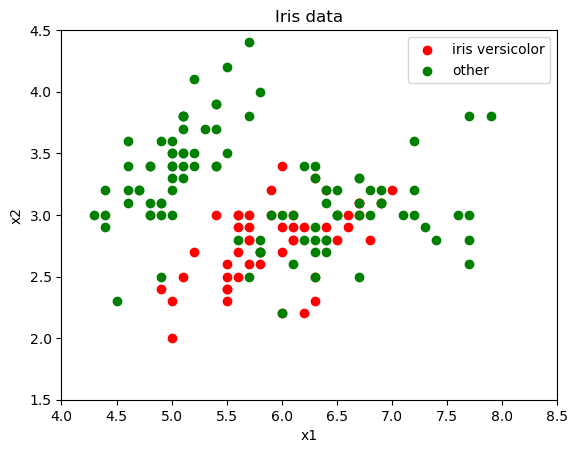

In [3]:
# plot iris data with two features
plt.scatter(X_versi[y_versi == 1, 0], X_versi[y_versi == 1, 1], c='red', label='iris versicolor')
plt.scatter(X_versi[y_versi == 0, 0], X_versi[y_versi == 0, 1], c='green', label='other')
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(4, 8.5)
plt.ylim(1.5, 4.5)
plt.title('Iris data')
plt.legend()

We split the data into a train and test (holdout) set with a split ratio of 75% to 25%.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_versi, y_versi, test_size=0.25, random_state=3)

The following <b style="color:cornflowerblue">function</b> is a little visualization helper that draws the values of the <b style="color:cornflowerblue">decision function</b> on a heat map given a matplotlib axe.

In [5]:
def show_decision_function(clf, ax):
    xx, yy = np.meshgrid(np.linspace(4, 8.5, 200), np.linspace(1.5, 4.5, 200))
    try:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
    except AttributeError:
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    #print(Z)
    #print(xx.shape)
    #print(Z.shape)
    Z = Z.reshape(xx.shape)
    #print(Z)
    fig.colorbar(ax.pcolormesh(xx, yy, Z, cmap=plt.cm.jet),ax=ax)
    ax.set_xlim(4, 8.5)
    ax.set_ylim(1.5, 4.5)
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100)

We now train a <b style="color:lightgreen">SVM(Support vector machine)</b> classifier on the training data and plot its decision boundary.

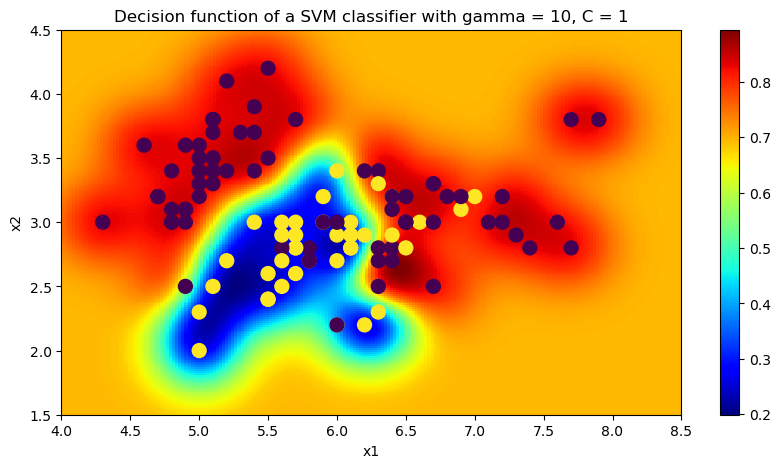

In [6]:
from sklearn.svm import SVC

clf_svm = SVC(gamma=10, C=1, probability=True)
clf_svm.fit(X_train, y_train)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
show_decision_function(clf_svm, ax)
plt.xlabel("x1")
plt.ylabel("x2")
#plt.legend()
ax.set_title('Decision function of a SVM classifier with gamma = 10, C = 1');

## Exercise 1.1 (Performance measures)
Classify the test data and evaluate the classification performance of the trained model <b style="color:lightgreen">SVM(Support vector machine)</b> = `clf_svm` using the `scikit-learn` `metrics` package. 

Compare various metrics:

<b style="color:cornflowerblue">classification accuracy</b> ${\color{CornflowerBlue}\eta}= $ `accuracy_score`

<b style="color:cornflowerblue">precision</b> ${\color{CornflowerBlue}P}=$ `precision_score`

<b style="color:cornflowerblue">recall</b> $ {\color{CornflowerBlue}R}=$ `recall_score`

<b style="color:cornflowerblue">f-score</b> ${\color{CornflowerBlue}F}_{\alpha=1}=$ `f1_score`

Interpret their values and argue which of them might be the most meaningful to report.

Calculation of <b style="color:cornflowerblue">classification accuracy</b> ${\color{CornflowerBlue}\eta} $ depends on  the number of correct predictions $ {\color{Chocolate}n}_{\color{VioletRed}i} $ and the amount of data $ {\color{Chocolate}N} $:

$$ 
{\color{CornflowerBlue}\eta} = \frac{\mathop{\color{CornflowerBlue}\sum}_{{\color{VioletRed}i}}\,{\color{Chocolate}n}_{\color{VioletRed}i}}{{\color{Chocolate}N}} \; .
$$

The  <b style="color:cornflowerblue">precision</b> ${\color{CornflowerBlue}P}$ is the ratio 

$$
{\color{CornflowerBlue}P} = \frac{{\color{Chocolate}n}_{\mathrm{TP}}}{{\color{Chocolate}n}_{\mathrm{TP}} + {\color{Chocolate}n}_{\mathrm{FP}}} \; .
$$

It is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

The <b style="color:cornflowerblue">recall</b> $ {\color{CornflowerBlue}R}$ is the ratio 

$$
{\color{CornflowerBlue}R} = \frac{{\color{Chocolate}n}_{\mathrm{TP}}}{{\color{Chocolate}n}_{\mathrm{TP}} + {\color{Chocolate}n}_{\mathrm{FN}}} \; .
$$

It is intuitively the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0.

The <b style="color:cornflowerblue">F-score</b> ${\color{CornflowerBlue}F}_{\alpha=1}$ score can be interpreted as a harmonic mean of the precision and recall, where an ${\color{CornflowerBlue}F}_{\alpha=1}$ score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the ${\color{CornflowerBlue}F}_{\alpha=1}$ score are equal. The formula for the ${\color{CornflowerBlue}F}_{\alpha=1}$ score is:

$$
{\color{CornflowerBlue}F}_{\alpha=1} = \frac{2 n_{\mathrm{TP}}}{2 n_{\mathrm{TP}}+ n_{\mathrm{FP}} + n_{\mathrm{FN}}} \; .
$$

$$
 n_{\mathrm{TP}} \;=\; \{ {\color{Dandelion}y}_\mathrm{pred} = {\color{Dandelion}y}_\mathrm{true} \quad \mathrm{and} \quad {\color{Dandelion}y}_\mathrm{true} > 0, \quad {\color{Dandelion}y}_\mathrm{pred} > 0 \}
$$
$$
 n_{\mathrm{FP}} \;=\; \{{\color{Dandelion}y}_\mathrm{pred} \neq {\color{Dandelion}y}_\mathrm{true} \quad \mathrm{and} \quad {\color{Dandelion}y}_\mathrm{true} < 0, \quad {\color{Dandelion}y}_\mathrm{pred} > 0\}
$$
$$
 n_{\mathrm{TN}} \;=\; \{{\color{Dandelion}y}_\mathrm{pred} = {\color{Dandelion}y}_\mathrm{true} \quad \mathrm{and} \quad {\color{Dandelion}y}_\mathrm{true} < 0, \quad {\color{Dandelion}y}_\mathrm{pred} < 0\}
$$
$$
 n_{\mathrm{FN}} \;=\; \{{\color{Dandelion}y}_\mathrm{pred} \neq {\color{Dandelion}y}_\mathrm{true} \quad \mathrm{and} \quad {\color{Dandelion}y}_\mathrm{true} > 0, \quad {\color{Dandelion}y}_\mathrm{pred} < 0\}
$$

In [7]:
from sklearn import metrics


y_pred=clf_svm.predict(X_test)


eta = metrics.accuracy_score(y_test, y_pred)

P = metrics.precision_score(y_test, y_pred, average='binary')

R = metrics.recall_score(y_test, y_pred, average='binary')

F1 = metrics.f1_score(y_test, y_pred, average='binary')

print('Accuracy: {}'.format(eta) )

print('Precision: {}'.format(P) )

print('Recall: {}'.format(R) )

print('F-score: {}'.format(F1) )



Accuracy: 0.7631578947368421
Precision: 0.6666666666666666
Recall: 0.5
F-score: 0.5714285714285714


## Exercise 1.2 (ROC curve)

To further evaluate the model, we want to plot a <b style="color:lightgreen">ROC (Receiver operating characteristic)</b> curve and look at the <b style="color:lightgreen">AUC (area under the curve)</b> value. Therefore, we provide a <b style="color:cornflowerblue">function</b> `plot_roc_curves` that accepts increasing false positive rates `fpr` $= {\color{Chocolate}n}_{\mathrm{FP}}$ and true positive rates `tpr` $= {\color{Chocolate}n}_{\mathrm{TP}}$ and plots the curve for you. 

Please calculate the false and true positive rates $ {\color{Chocolate}n}_{\mathrm{FP}}, {\color{Chocolate}n}_{\mathrm{TP}}$ of the <b style="color:cornflowerblue">classifier</b> `clf_svm` on the test data `X_test` and draw the <b style="color:lightgreen">ROC</b> curve by executing the <b style="color:cornflowerblue">function</b> `plot_roc_curves`. What does the <b style="color:lightgreen">ROC</b> and <b style="color:lightgreen">AUC</b> tell us about the classifier's performance?

- [X] calculate $ {\color{Chocolate}n}_{\mathrm{FP}}, {\color{Chocolate}n}_{\mathrm{TP}}$
- [X] draw ROC curve
- [ ] explain ROC and AUC for this problem

In [108]:
# helper to plot ROC curves
def plot_roc_curves(fprs, tprs):    
    fig = plt.figure(figsize=(10,10))
    i = 0
    markers = ['v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_',',','o']
    lines=['-','--','-.',':']
    for fpr, tpr in zip(fprs, tprs):
        plt.plot(fpr, tpr,linestyle=lines[i],marker=markers[i],markersize=10, label='Model %s ROC curve (AUC = %0.2f)' % ( i,metrics.auc(fpr, tpr) ))
        i = i+1
    
    plt.plot([-0.02, 1.05], [-0.02, 1.05], 'k--')
    plt.xlim([-0.02, 1.05])
    plt.ylim([-0.02, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

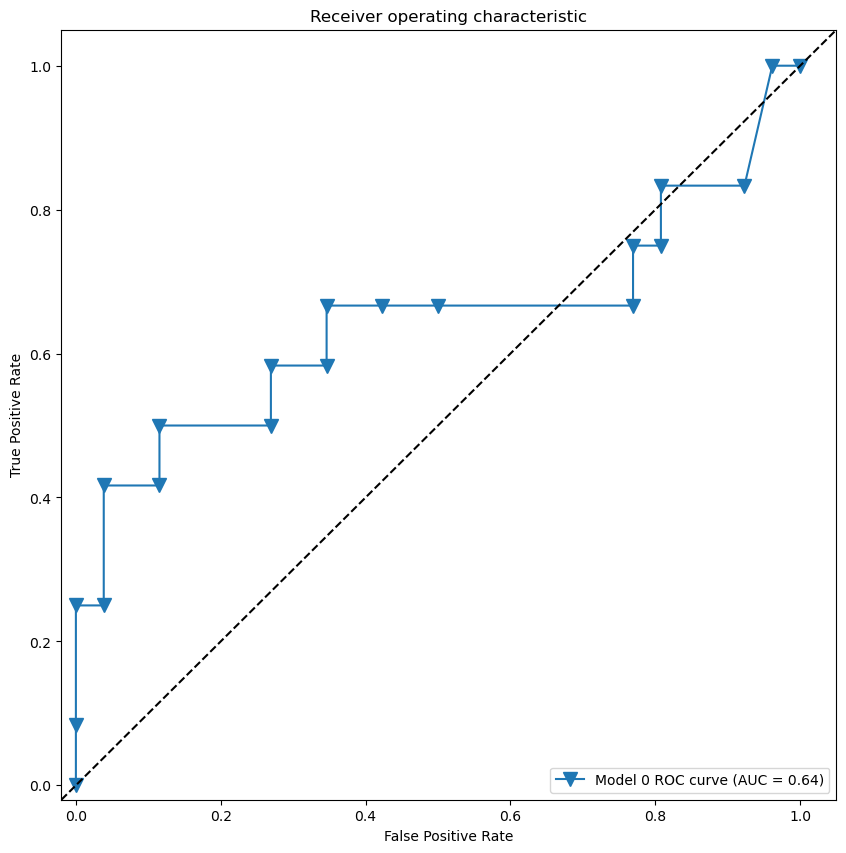

[        inf  1.14437809  0.95095325  0.87948569  0.72398865  0.31923202
  0.28150087 -0.60979751 -0.69766338 -0.76260306 -0.80289745 -0.88477636
 -0.88684101 -0.99959116 -1.00036058 -1.00090697 -1.00141243 -1.06563215
 -1.08942311 -1.15326142]
[-0.9349972  -0.97325686 -0.99959116 -0.72990561 -0.60979751 -0.76260306
  1.14437809 -0.94186419 -0.22702927 -1.08942311  1.01842308 -1.00090697
  0.86692243  0.72398865 -1.08942311 -1.0376634  -0.69766338 -0.91487568
  0.87948569 -0.88477636  0.31923202 -0.91297154 -0.88684101 -0.80289745
 -1.06563215 -0.51445337  0.34448267  0.95095325  0.28150087 -1.08942311
 -0.83667177 -1.00723194 -0.88684101 -1.00141243 -0.94038048 -1.15326142
 -1.00036058 -0.42082734]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [109]:
####################
# INSERT CODE HERE #
####################
#print(y_test)

#y_pred_proba = clf_svm.predict_proba(X_test)[:, 0]
y_pred_proba = clf_svm.decision_function(X_test)

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

#fpr, tpr = np.zeros(len(y_test)), np.zeros(len(y_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)

#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)


# plot the curve
plot_roc_curves([fpr], [tpr])

print(thresholds)
print(y_pred_proba)
print(y_pred)

## Exercise 1.3 (Model comparison)

Train four more <b style="color:lightgreen">SVM</b> models on the training data by varying the regularization parameter $\color{Tomato}C$ (the gamma parameter ${\color{Tomato}\gamma}=10$ again). Put the <b style="color:lightgreen">models</b> into a list `clfs` using the append method. You can add a name to each classifier by setting `clf.name` = "some description" to keep track of the configuration.

- [X] train 4 SVM models with repsect to the parameter ${\color{Tomato}C}$ and constant ${\color{Tomato}\gamma}=10$
  - [X] use list `clfs`
  - [X] set names for them with `clf.name` = "some description"

In [89]:
clfs = []

stepsize=5

for i in range(4):
    clfs.append(SVC(gamma=10, C=i*stepsize+1, probability=True))
    clfs[i].fit(X_train, y_train)
    clfs[i].name="SVM Model with Parameter C = {} gamma = {}".format(i*stepsize+1, 10)
#print(clfs)

Let's have a look at the decision functions of the four classifiers...

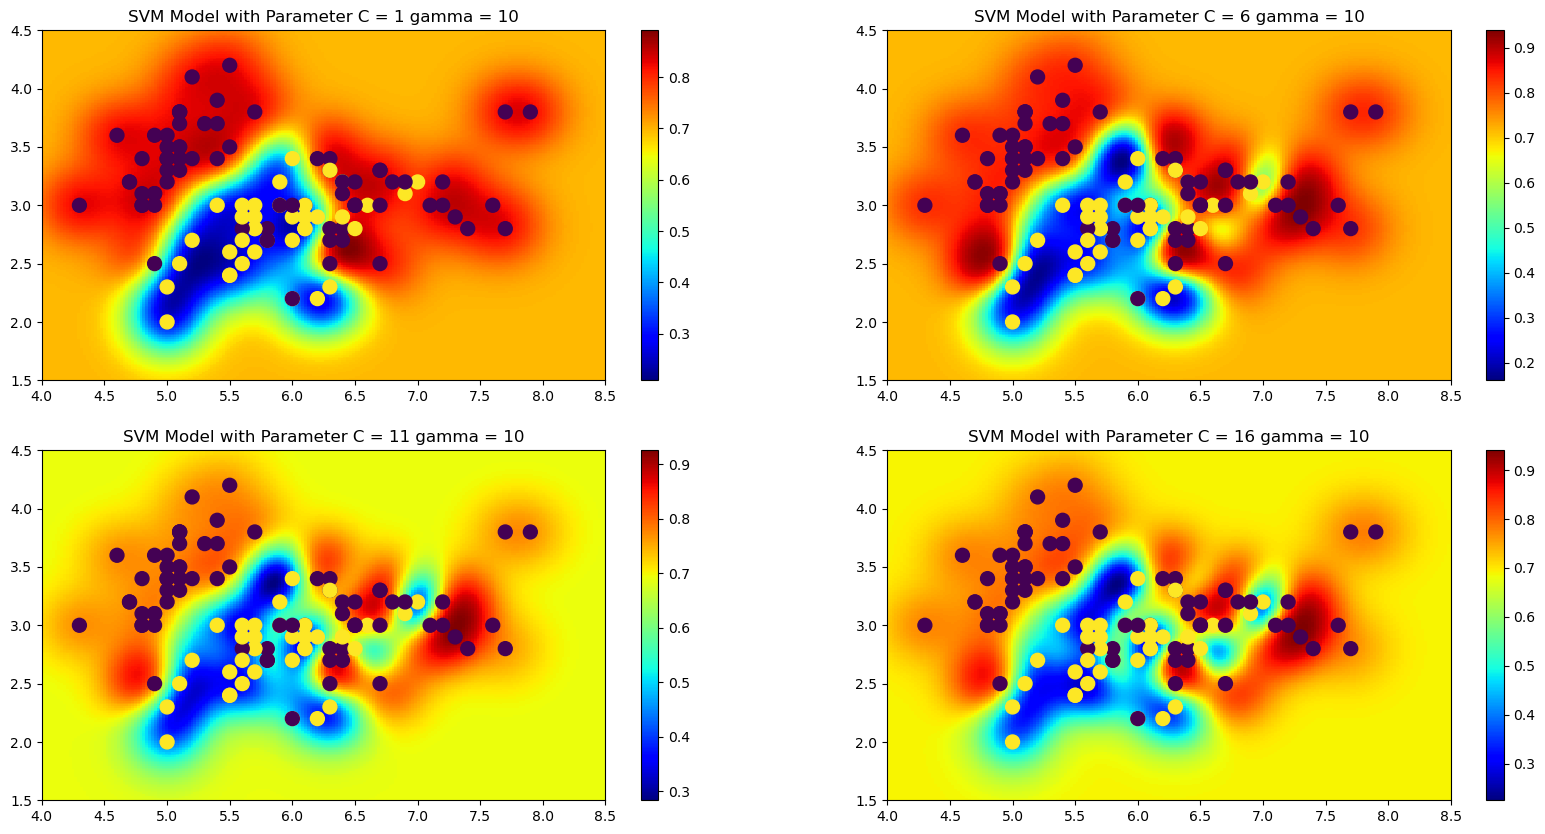

In [48]:
# visualize the decision functions of the four different classifiers
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

for clf, ax in zip(clfs, axes.ravel()):
    show_decision_function(clf, ax)
    ax.set_title(clf.name)

... and draw the ROC curves.

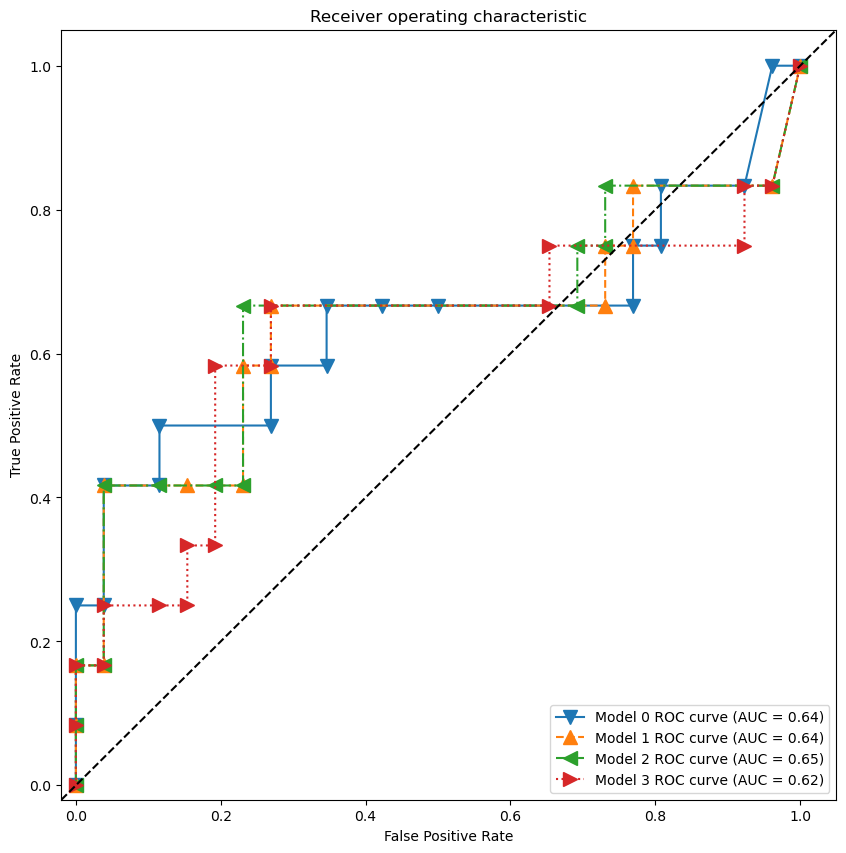

In [110]:
# draw the roc curves:

fprs, tprs = [], []

for clf in clfs:
    y_score = clf.decision_function(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_score, pos_label=1)
    fprs.append(fpr)
    tprs.append(tpr)
    
plot_roc_curves(fprs, tprs)

# 2. Hyperparameter Tuning

Many models have hyperparameters, parameters that can't directly be estimated from the <b style="color:Chocolate">data</b>. They have to be manually tuned by the practioner, because there is no analytical formula available to calculate an appropriate value. One example is the regularization parameter  $\color{Tomato}C$ in SVMs.

## Exercise 2.1 (Nested cross-validation)

Train a <b style="color:lightgreen">SVM classifier</b> for the detection of <b style="color:lightgreen">iris versicolor </b> again, but this time with a proper tuning of the regularization parameter  $\color{Tomato}C$ (set the parameter ${\color{Tomato}\gamma} = 10$  again). Select a reasonable range of parameter values for  $\color{Tomato}C$ and implement a nested <b style="color:lightgreen">cross-validation CV</b> (as shown on the slides) by yourself. 

You can use the following helper function`create_kfold_mask`(${\color{Tomato}n}, {\color{Tomato}k}$) that creates a list of masks. Each mask can be used as an index set to select the test samples. The function accepts the number of samples `num_samples`$={\color{Tomato}n}$ in the <b style="color:Chocolate">dataset</b> and the desired number of folds $\color{Tomato}k$ as input parameters. Since the <b style="color:Chocolate">data</b> is sorted by the labels the <b style="color:lightgreen"> $\color{Tomato}k$-fold cross-validation CV</b> will likely have trouble with class imbalances in the some cases. So you should randomly shuffle the data before applying the masks.

- [ ] tuning the model <b style="color:lightgreen">SVM classifier</b> with respect to the parameter ${\color{Tomato}C}$
- [ ] implement <b style="color:lightgreen"> $\color{Tomato}k$-fold cross-validation CV</b>
    - [X] attention maybe some inbalances in classes
    - [ ] number of folds $\color{Tomato}k$
    - [ ] shuffle the data randomly
    - [ ] set parameter ${\color{Tomato}\gamma}=10$
    - [ ] set range for ${\color{Tomato}C}$
    

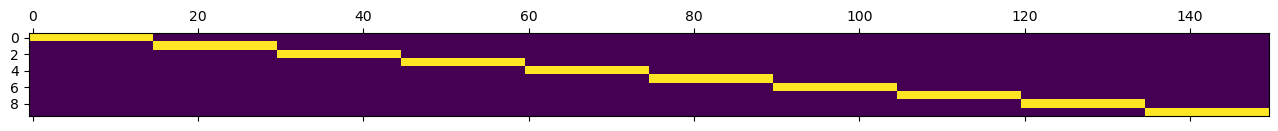

In [113]:
# helper function to create k-fold train-test-splits
def create_kfold_mask(num_samples, k):
    masks = []
    fold_size = num_samples / k
    
    for i in range(k):
        mask = np.zeros(num_samples, dtype=bool)
        mask[i*int(fold_size):(i+1)*int(fold_size)] = True
        masks.append(mask)
        
    return masks

# visualization of the splits created by 'create_kfold_mask'
masks = create_kfold_mask(150, 10)
plt.matshow(masks)
#print(masks)

In [ ]:
####################
# INSERT CODE HERE #
####################